# Notebook for Maximum Likelihood Estimation
In this notebook following aspects of this estimation will be examined.

- accuracy
- bias



##  1.Create Simulation Enviroment

In this example $Y=AX+N$ simulation enviroment will be created.
In this equation:
- Y is the observation
- A is system geometry parameters
- X is varible (the thing which is observed )
- N is randomly distrubuted zero mean gaussian noise

Size of this vector and matrices are:
$$ Y_{mx1}=A_{mxn}X_{nx1} + N_{mx1} $$


now contiune with code.

#### Import libraries


In [37]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

#plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib notebook 

#### Create X and sizes
- X will be read from image and converted to vector
- X will be resized to (K,L) and normalized to between 0-1
- size of the image is (K,L) so n should be K*L


c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


<IPython.core.display.Javascript object>


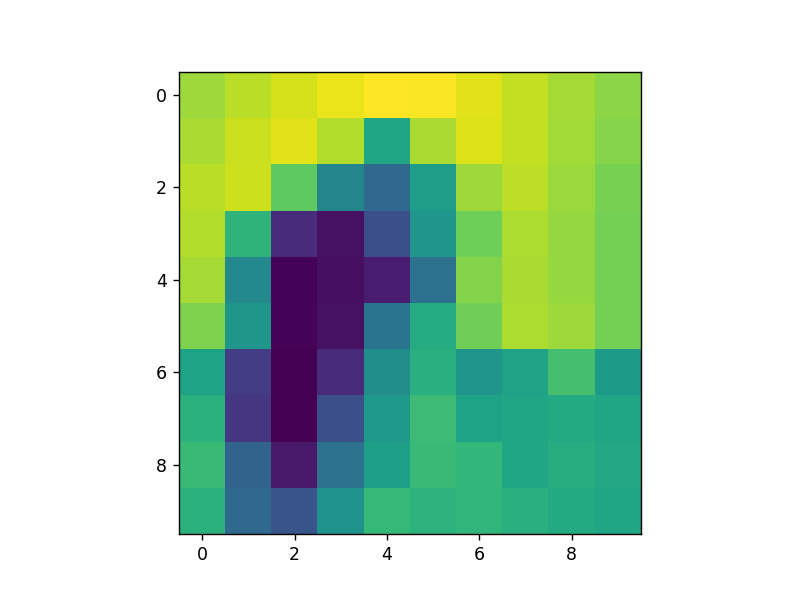

[[0.62745098 0.65490196 0.68235294 0.70588235 0.7254902  0.72156863
  0.69411765 0.6627451  0.63529412 0.60784314]
 [0.63921569 0.67058824 0.69411765 0.64705882 0.44705882 0.63921569
  0.69019608 0.6627451  0.63137255 0.60392157]
 [0.65490196 0.6745098  0.55686275 0.35686275 0.28235294 0.42745098
  0.62745098 0.65882353 0.62352941 0.58823529]
 [0.64705882 0.49019608 0.1372549  0.08235294 0.21568627 0.40392157
  0.57647059 0.64313725 0.61960784 0.58431373]
 [0.63529412 0.36862745 0.05882353 0.07843137 0.10588235 0.30196078
  0.6        0.63921569 0.61960784 0.58431373]
 [0.59607843 0.40784314 0.05882353 0.08235294 0.30980392 0.46666667
  0.58039216 0.64313725 0.62745098 0.58431373]
 [0.44313725 0.17254902 0.05098039 0.13333333 0.38431373 0.47843137
  0.40392157 0.43921569 0.5254902  0.41960784]
 [0.48235294 0.15686275 0.05098039 0.21568627 0.41568627 0.51372549
  0.44313725 0.44705882 0.4627451  0.45098039]
 [0.50588235 0.26666667 0.09803922 0.30196078 0.43137255 0.50588235
  0.49803922

In [38]:
K = 10
L = 10
m = int(1.2*K*L)
n = K*L

# Create X read image
X_image = misc.imread('test/test1.jpg', mode="L") # grayscale mode
X_image = misc.imresize(X_image, (K,L))/ 255
#convert to vector
def toVector(a):
    return a.reshape(-1,1) 
    
def toImage(a):
    return a.reshape(K,L)

X = toVector(X_image)
plt.figure()
plt.imshow(X_image)
print(X_image)

#### Create Noise

Gaussian noise is defined using mean and varience.
For this simulation mean is selected as 0 and varience is selected as XXXX

In [39]:
N =  (np.random.rand(m,1)-0.5) /2
print(N)

[[ 0.04275652]
 [ 0.08656685]
 [ 0.11773606]
 [ 0.09262756]
 [-0.08003837]
 [-0.09946227]
 [-0.10071478]
 [ 0.15259567]
 [ 0.00486486]
 [ 0.0184938 ]
 [ 0.02984505]
 [ 0.14618736]
 [-0.19194266]
 [ 0.15928094]
 [-0.00184664]
 [ 0.1629151 ]
 [ 0.01504593]
 [ 0.0118243 ]
 [ 0.10323634]
 [-0.14291273]
 [-0.13566688]
 [-0.02493465]
 [ 0.20723598]
 [ 0.24163459]
 [ 0.1011064 ]
 [-0.02769167]
 [-0.01722925]
 [-0.23921577]
 [ 0.17207671]
 [ 0.0230407 ]
 [ 0.13696477]
 [-0.21398732]
 [-0.13316046]
 [-0.16790735]
 [-0.24694218]
 [ 0.05359351]
 [-0.20769474]
 [ 0.01777087]
 [ 0.10528854]
 [ 0.0560264 ]
 [ 0.1823277 ]
 [-0.1333304 ]
 [-0.12194055]
 [ 0.22636484]
 [-0.22269635]
 [ 0.19182178]
 [ 0.02924002]
 [ 0.19001941]
 [ 0.17293104]
 [ 0.03970612]
 [ 0.03534263]
 [-0.16694379]
 [-0.08589897]
 [ 0.11700211]
 [ 0.24570343]
 [-0.05963422]
 [ 0.20211462]
 [ 0.2449714 ]
 [-0.06248481]
 [-0.16228063]
 [ 0.03482506]
 [ 0.17995395]
 [-0.11766263]
 [-0.05356437]
 [-0.14239376]
 [ 0.07080804]
 [-0.02774

#### Create Y and A at suitable dimesion
- A is generated randomly
- to calculate Y formula is $Y=AX+N$

In [40]:

A = np.random.rand(m,n)
Y = A@X + N

print( np.shape(Y), np.shape(A), np.shape(X), np.shape(N) )


(120, 1) (120, 100) (100, 1) (120, 1)


## 2. Calculate maximum likelihood
Maximum likelihood is calculated using this formula

$$X_{ml} = (A^TA)^{-1}.A^T.Y$$


In [41]:
Xml =  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y


<IPython.core.display.Javascript object>


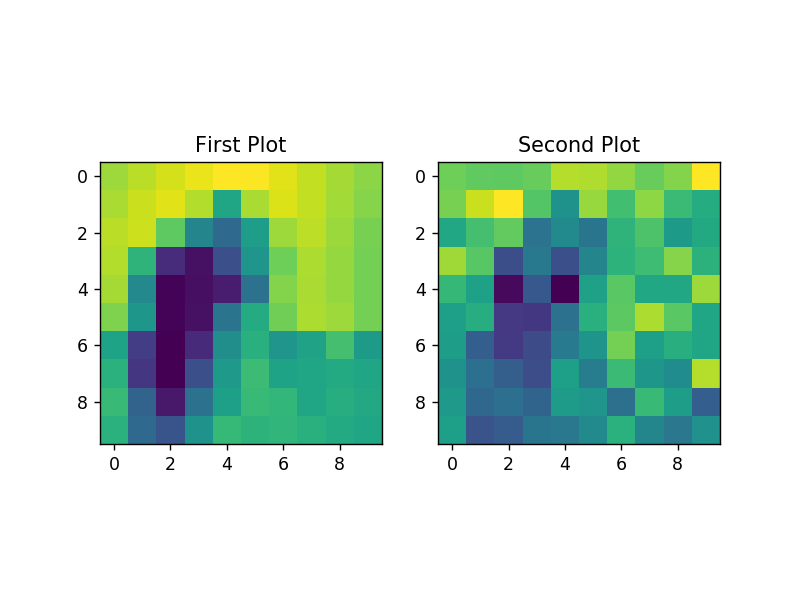

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(toImage(X))
ax2 = fig.add_subplot(122)
ax2.imshow(toImage(Xml))
ax1.title.set_text('First Plot')
ax2.title.set_text('Second Plot')
plt.show()

#### This simulation should be converted to function to easily run

In [43]:
def calculateMaxlikelihood(A, X):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5) /2
    Y = A@X + N
    # return Xml
    return  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y
    

## 2. Bias of maximum likelihood
Bias of maximum likelihood calculated as:

Theoritical bias of maximum likelihood is zero. It can be calculated as:

Therefore the real bias should be decrease with increase of tries


In [44]:
def calculcateBias(x, xml):
    B = x-xml
    return np.sum(B)/len(x)
    

Run simulation 100.000 times and save all bias to an array

<IPython.core.display.Javascript object>


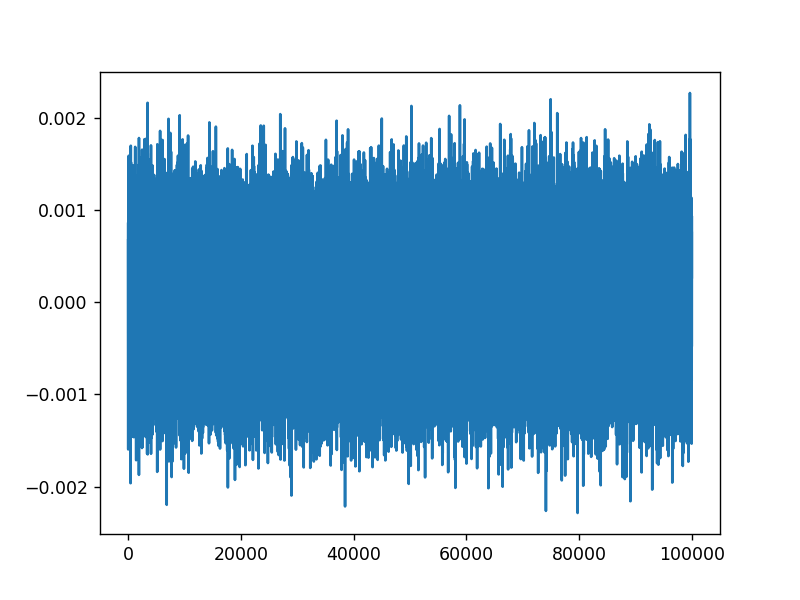

In [47]:
biasArr = [] 
for i in range(100000):
    curTryBias = calculcateBias(X, calculateMaxlikelihood(A,X))
    biasArr.append(curTryBias)
plt.figure()
plt.plot(biasArr)
    


[2.16542745e-04 9.05447025e-05 1.54370692e-05 3.00899349e-06
 1.89020640e-06]


<IPython.core.display.Javascript object>


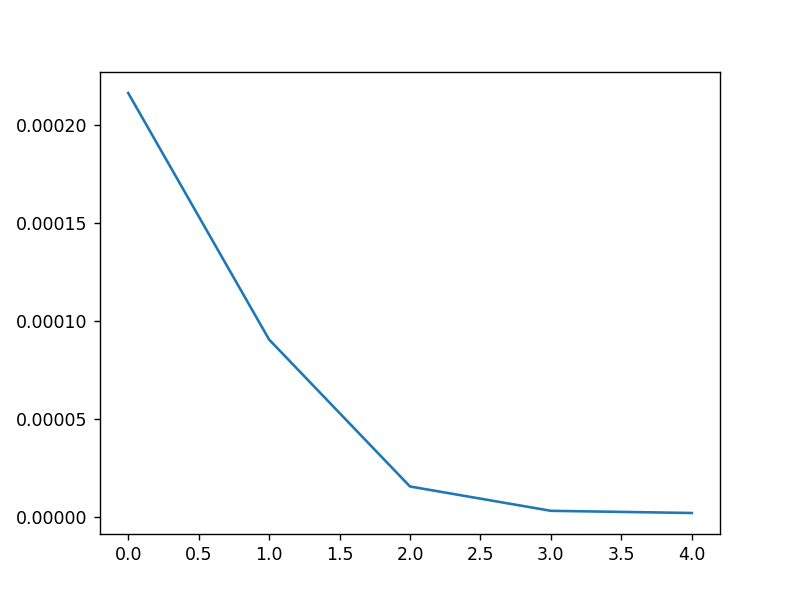

In [50]:
sample10 = np.sum( biasArr[0:10] )/10
sample100 = np.sum( biasArr[0:100] )/100
sample1_000 = np.sum( biasArr[0:1000] )/1000
sample10_000 = np.sum( biasArr[0:10000] )/10000
sample100_000 = np.sum( biasArr[0:100000] )/100000

biasSampleArr = np.abs([sample10, sample100, sample1_000, sample10_000, sample100_000])
print( biasSampleArr )
plt.figure()
plt.plot(biasSampleArr)
plt.show()

## 3. Varience of maximum likelihood
Varience of estimations calculated as:

$$
varience = \frac1{n} \sum\limits_{i=1}^n(x_i - \overline{x})^2 
$$


In [51]:
def calculateVarience(x, xml):
    V = np.square(x-xml) 
    return V.mean()

Run simulation 100.000 times and save all varience to an array

<IPython.core.display.Javascript object>


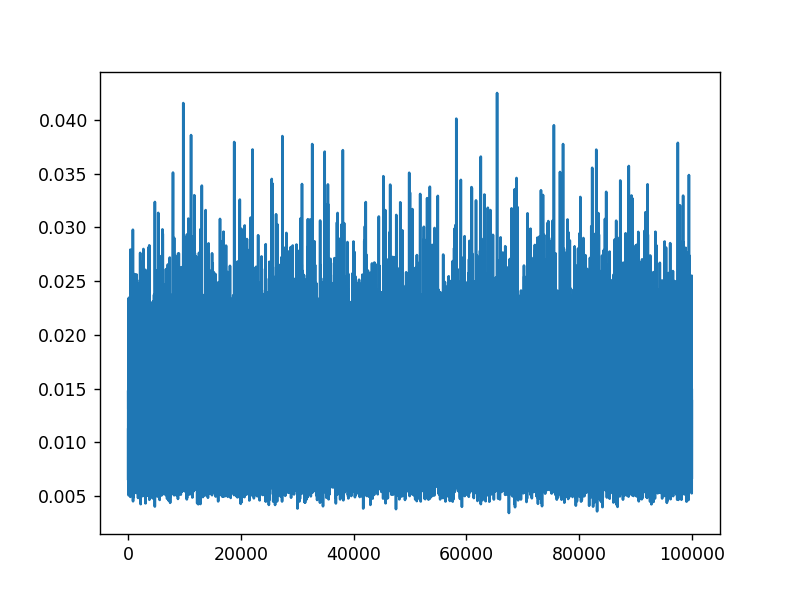

In [52]:
varArr = [] 
for i in range(100000):
    curTryVar = calculateVarience(X, calculateMaxlikelihood(A,X))
    varArr.append(curTryVar)
plt.figure()
plt.plot(varArr)
    

[0.01255196 0.01221767 0.01229897 0.01226929]


<IPython.core.display.Javascript object>


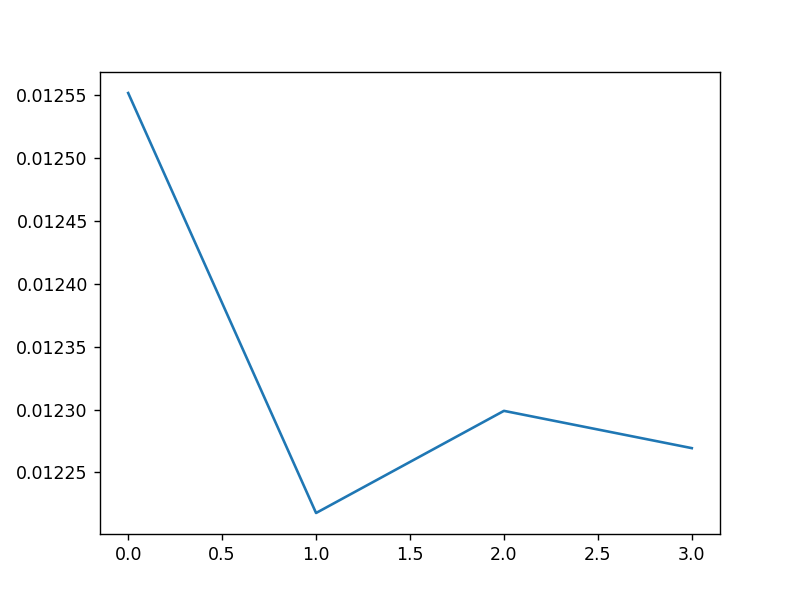

In [34]:
sample10 = np.sum( varArr[0:10] )/10
sample100 = np.sum( varArr[0:100] )/100
sample1_000 = np.sum( varArr[0:1000] )/1000
sample10_000 = np.sum( varArr[0:10000] )/10000
sample100_000 = np.sum( varArr[0:100000] )/100000

varSampleArr = np.abs([sample10, sample100, sample1_000, sample10_000, sample100_000])
print( varSampleArr )
plt.figure()
plt.plot(varSampleArr)
plt.show()